<a href="https://colab.research.google.com/github/amitpal16181/deepmindAICoursera_codePractice/blob/main/fashionMNIST_Coursera_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Beyond Hello World, A Computer Vision Example
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

# Importing required libraries
We will import tensorflow, keras, numpy and matplotlib.

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)

2.9.2


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [30]:
fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [31]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.


LABEL: 9

Image Pixel Array: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3  

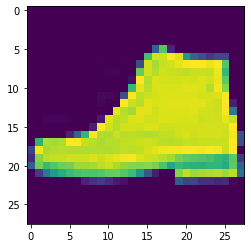

In [32]:
# index value
index = 42

# Setting number of characters per row while printing
np.set_printoptions(linewidth=400)

# Print the label and images
print(f"LABEL: {training_labels[index]}")
print(f"\nImage Pixel Array: {training_images[index]}")

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [33]:
# Normalizing the values
training_images = training_images/255.0
test_images = test_images/255.0


Now you might be wondering why the dataset is split into two: training and testing? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them. 

In [34]:
# Build the model to classify images
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) 

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [38]:
# Declaring Sample inputs
inputs = np.array([[2.0, 5.0, 3.0, 6.0, 12.0]])
inputs = tf.convert_to_tensor(inputs)
print(f"Input array: {inputs.numpy()}")

# Calling Softmax function
outputs = tf.keras.activations.softmax(inputs)
print(f"Output array: {outputs.numpy()}")

# Getting sum of all values after softmax
sum = tf.reduce_sum(outputs)
print(f"Sum: {sum}")

# Getting the highest value index
prediction = np.argmax(outputs)
print(f"Highest value index: {prediction}")

Input array: [[ 2.  5.  3.  6. 12.]]
Output array: [[4.52389044e-05 9.08647685e-04 1.22972092e-04 2.46996049e-03 9.96453181e-01]]
Sum: 1.0
Highest value index: 4


In [41]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [45]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2814 - accuracy: 0.8947
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.9002
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9039
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2471 - accuracy: 0.9081
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2387 - accuracy: 0.9111
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2319 - accuracy: 0.9137
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2239 - accuracy: 0.9152
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2162 - accuracy: 0.9185
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2089 - accuracy: 0.9205
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.20

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [46]:
# Evaluating the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8845


[0.34204015135765076, 0.8845000267028809]

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 